In [2]:
# Librerias
import pandas as pd
import numpy  as np  

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preparación de datos: División train/test

In [3]:
# Cargar dataset
full_df = pd.read_csv("airbnb-listings-extract.csv", sep=None, engine="python")

# Dividir en train/test
train_df, test_df = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=42)

print(f'Dimensiones del dataset de training: {train_df.shape}')
print(f'Dimensiones del dataset de test: {test_df.shape}')

# Guardar en csv separados
train_df.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
test_df.to_csv('./airbnb_test.csv', sep=';', decimal='.', index=False)

airbnb_data = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,8494011,16865230,9695108,18088037,3137010
Listing Url,https://www.airbnb.com/rooms/8494011,https://www.airbnb.com/rooms/16865230,https://www.airbnb.com/rooms/9695108,https://www.airbnb.com/rooms/18088037,https://www.airbnb.com/rooms/3137010
Scrape ID,20170407214119,20170407214119,20170507222235,20170407214119,20170315084710
Last Scraped,2017-04-08,2017-04-08,2017-05-08,2017-04-08,2017-03-15
Name,CITY CENTER LATINA B ROOM 2,Tu SUITE en el corazón de MALASAÑA,Room in amazing Kreuzberg-Neukoln,Habitación con balcón en la Latina!,Vista Hermosa-Apartment
...,...,...,...,...,...
Cancellation Policy,strict,strict,flexible,strict,strict
Calculated host listings count,97.0,1.0,1.0,38.0,1.0
Reviews per Month,0.11,NaN,NaN,NaN,1.58
Geolocation,"40.4102231405,-3.70867805612","40.4272898629,-3.70437160544","52.4832726772,13.4425265568","40.4123714758,-3.71252881444","39.3674540905,3.22948720166"


## 2. Análisis exploratorio

### Exploración

In [4]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11344 non-null  object 
 6   Space                           8671 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7268 non-null   object 
 10  Notes                           4463 non-null   object 
 11  Transit                         7207 non-null   object 
 12  Access                          

In [5]:
# Eliminación de columnas que no tienen ningún valor predictivo
columns_to_drop_1 = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url']

airbnb_data = airbnb_data.drop(columns=columns_to_drop_1)

In [6]:
#Análisis Estadístico
airbnb_data.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,10286.000000,11822.000000,11822.000000,11824.000000,11824.000000,11824.000000,11778.000000,11805.000000,11788.000000,471.000000,...,11824.000000,9169.000000,9149.000000,9154.000000,9142.000000,9156.000000,9139.000000,9139.000000,11821.000000,9283.000000
mean,94.742660,12.542294,12.542294,40.497385,-3.838638,3.264970,1.281245,1.342313,2.038259,381.411890,...,22.465071,91.684371,9.412723,9.327616,9.618792,9.645151,9.532662,9.212058,9.478048,1.865575
std,15.337695,34.215496,34.215496,4.590549,14.010897,2.091109,0.656424,0.903123,1.615751,640.974043,...,37.715834,9.034297,0.930438,0.990421,0.801247,0.770007,0.777009,0.958257,23.630338,1.864372
min,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,99.000000,1.000000,1.000000,40.409737,-3.707535,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,40.419453,-3.700769,3.000000,1.000000,1.000000,2.000000,86.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.190000
75%,100.000000,6.000000,6.000000,40.430843,-3.684171,4.000000,1.000000,2.000000,2.000000,603.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,6997.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [7]:
# Análisis Estadístico de la variable objetivo Price
airbnb_data['Price'].describe()

count    11812.000000
mean        73.633678
std         72.260255
min          9.000000
25%         34.000000
50%         55.000000
75%         87.000000
max        999.000000
Name: Price, dtype: float64

In [8]:
# Valores nulos en cada columna
airbnb_data.isnull().sum()

Name                                 1
Summary                            480
Space                             3153
Description                          6
Experiences Offered                  0
                                  ... 
Cancellation Policy                  0
Calculated host listings count       3
Reviews per Month                 2541
Geolocation                          0
Features                             1
Length: 77, dtype: int64

In [9]:
# Porcentaje de nulos por columna
percent_nulls = (airbnb_data.isnull().sum() / len(airbnb_data)) * 100

percent_nulls = percent_nulls.sort_values(ascending=False)

# Columnas con más del 70% de registrso
columns_to_drop_2 = percent_nulls[percent_nulls >= 70].sort_values(ascending=False).to_frame(name="Porcentaje de nulos")
columns_to_drop_2

,Porcentaje de nulos
Has Availability,99.906969
Host Acceptance Rate,99.720907
Jurisdiction Names,98.511502
License,97.708051
Square Feet,96.016576
Monthly Price,75.794993
Weekly Price,75.600474


In [10]:
# Eliminación de columnas con más del 70% de registros nulos.
columns_to_drop_2 = percent_nulls[percent_nulls >= 70].index.tolist()
airbnb_data = airbnb_data.drop(columns=columns_to_drop_2)

In [11]:
airbnb_data.select_dtypes(include='object').nunique().sort_values()

Room Type                           3
Host Response Time                  4
Bed Type                            5
Experiences Offered                 5
Cancellation Policy                 8
Country                            17
Country Code                       18
Property Type                      22
Calendar last Scraped              38
Market                             41
Neighbourhood Group Cleansed       48
Calendar Updated                   56
Features                           82
State                              92
Host Verifications                186
City                              217
Smart Location                    225
Neighbourhood                     351
Host Neighbourhood                356
Neighbourhood Cleansed            444
Host Location                     497
Zipcode                           551
Last Review                       731
Street                           1450
First Review                     1588
Host Since                       2048
Host Name   

### Outliers
 Analisis de las siguientes variables en busca de valores atípicos:
- Price
- Accommodates
- Bedrooms
- Bathrooms

In [12]:
variables = ["Price", "Accommodates", "Bedrooms", "Bathrooms"]

summary = airbnb_data[variables].describe().T 
summary

,count,mean,std,min,25%,50%,75%,max
Price,11812.0,73.633678,72.260255,9.0,34.0,55.0,87.0,999.0
Accommodates,11824.0,3.264970,2.091109,1.0,2.0,3.0,4.0,16.0
Bedrooms,11805.0,1.342313,0.903123,0.0,1.0,1.0,2.0,10.0
Bathrooms,11778.0,1.281245,0.656424,0.0,1.0,1.0,1.0,8.0


**Distribución de las variables**

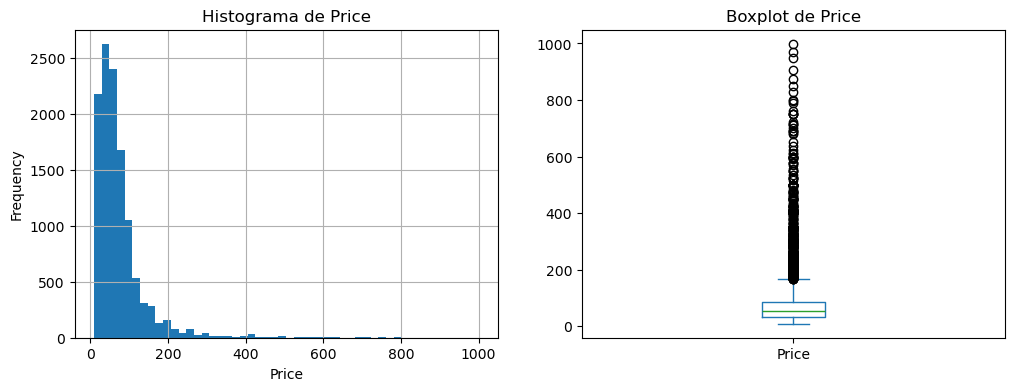

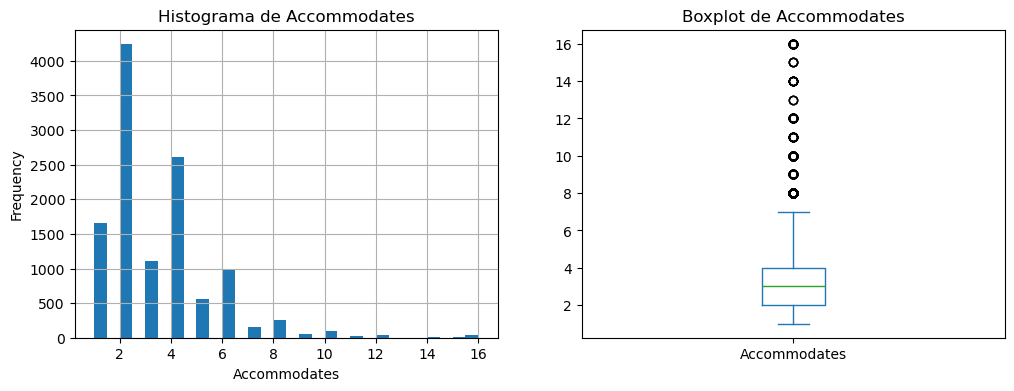

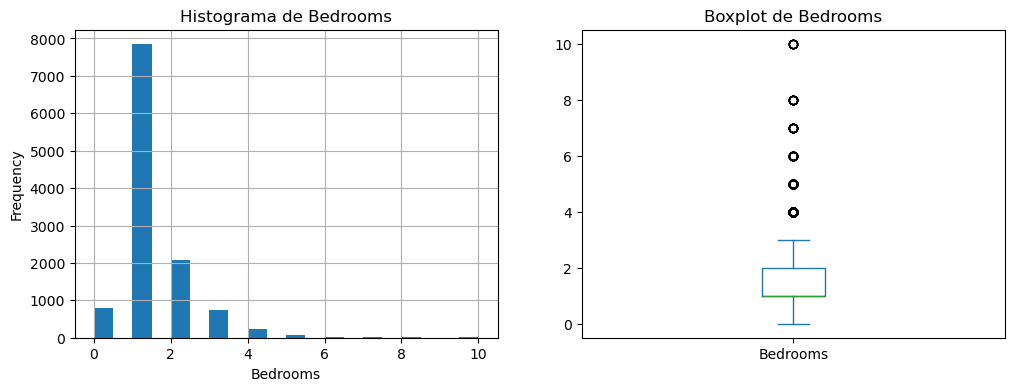

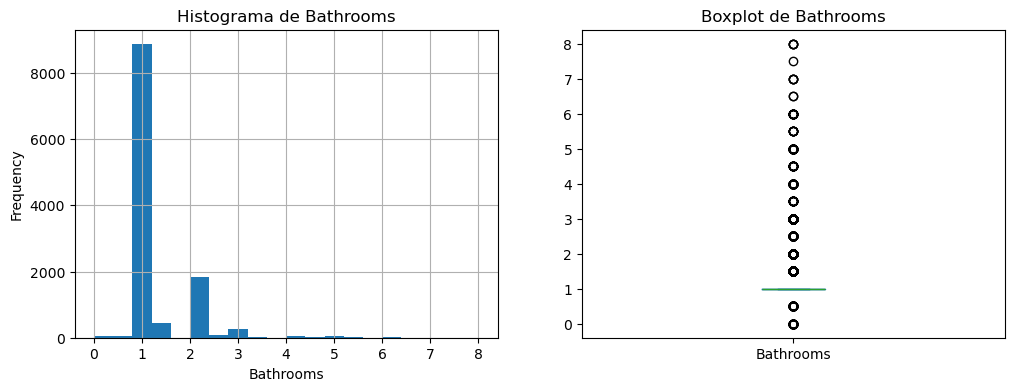

In [13]:
# Price
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
airbnb_data["Price"].plot.hist(bins=50, grid=True)
plt.xlabel("Price")
plt.title("Histograma de Price")

plt.subplot(1, 2, 2)
airbnb_data["Price"].plot.box()
plt.title("Boxplot de Price")

plt.show()

# Accomodates
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
airbnb_data["Accommodates"].plot.hist(bins=30, grid=True)
plt.xlabel("Accommodates")
plt.title("Histograma de Accommodates")

plt.subplot(1, 2, 2)
airbnb_data["Accommodates"].plot.box()
plt.title("Boxplot de Accommodates")

plt.show()

# Bedrooms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
airbnb_data["Bedrooms"].plot.hist(bins=20, grid=True)
plt.xlabel("Bedrooms")
plt.title("Histograma de Bedrooms")

plt.subplot(1, 2, 2)
airbnb_data["Bedrooms"].plot.box()
plt.title("Boxplot de Bedrooms")

plt.show()

# Bathrooms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
airbnb_data["Bathrooms"].plot.hist(bins=20, grid=True)
plt.xlabel("Bathrooms")
plt.title("Histograma de Bathrooms")

plt.subplot(1, 2, 2)
airbnb_data["Bathrooms"].plot.box()
plt.title("Boxplot de Bathrooms")

plt.show()

**Relación entre Price y las siguientes variables: Bedrooms, Accommodates y Bathrooms**

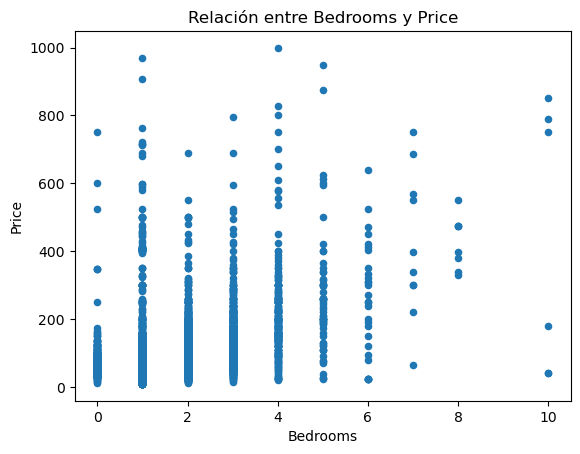

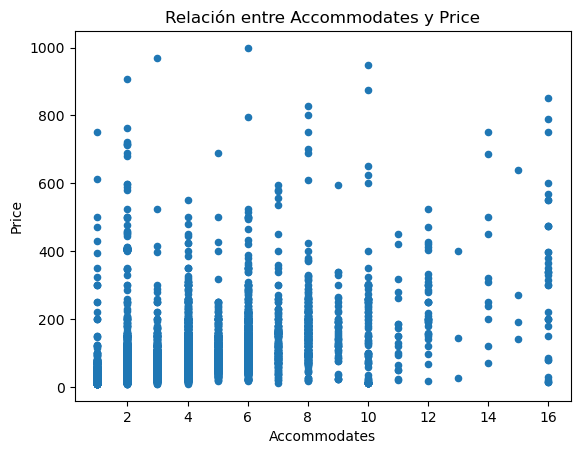

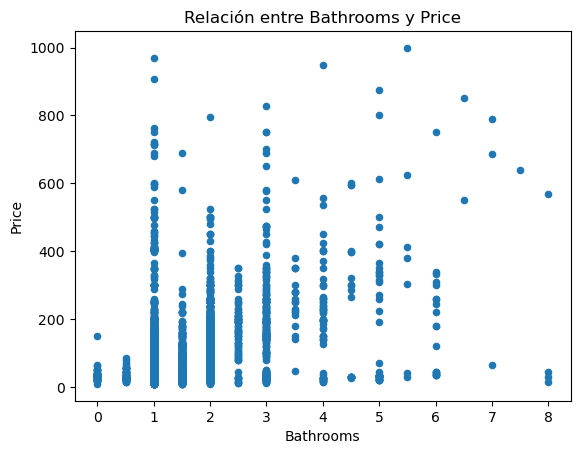

In [14]:
airbnb_data.plot(kind='scatter', x='Bedrooms', y='Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Relación entre Bedrooms y Price')
plt.show()

airbnb_data.plot(kind='scatter', x='Accommodates', y='Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Relación entre Accommodates y Price')
plt.show()

airbnb_data.plot(kind='scatter', x='Bathrooms', y='Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Relación entre Bathrooms y Price')
plt.show()

**Análisis de value_counts de las variables**

In [15]:
airbnb_data["Bedrooms"].value_counts().sort_index()

Bedrooms
0.0      798
1.0     7842
2.0     2072
3.0      738
4.0      237
5.0       63
6.0       29
7.0       11
8.0        9
10.0       6
Name: count, dtype: int64

In [16]:
airbnb_data["Accommodates"].value_counts().sort_index()

Accommodates
1     1659
2     4238
3     1111
4     2614
5      558
6      980
7      153
8      255
9       52
10      91
11      19
12      39
13       3
14      11
15       4
16      37
Name: count, dtype: int64

In [17]:
airbnb_data["Bathrooms"].value_counts().sort_index()

Bathrooms
0.0      48
0.5      58
1.0    8863
1.5     454
2.0    1833
2.5      82
3.0     251
3.5      20
4.0      61
4.5      21
5.0      48
5.5       7
6.0      21
6.5       2
7.0       4
7.5       1
8.0       4
Name: count, dtype: int64

- **Price** presenta una gran cantidad de valores extremos que podrían distorsionar el modelo. 
- **Bedrooms** muestra valores muy poco frecuentes (≥ 9) y registros con 0 dormitorios que deben revisarse. Umbral<=8
- **Accommodates** hay una bajada en la frecuencia a partir de 10 personas. Podrían agruparse o considerarse casos especiales. Umbral <=10
- **Bathrooms** incluye registros con 0 baños (posibles errores) y casos muy raros con más de 6 baños, posibles outliers. Umbral<=6

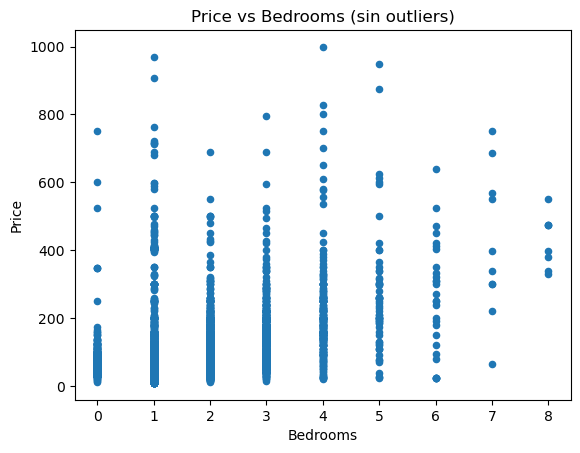

Original: 11824 // Modificado: 11799
Diferencia: 25
Variación: 0.21%


In [18]:
# Bedrooms
airbnb_no_out_bedrooms = airbnb_data[airbnb_data["Bedrooms"] <= 8]

airbnb_no_out_bedrooms.plot(kind='scatter', x='Bedrooms', y='Price')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms (sin outliers)")
plt.show()

print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_no_out_bedrooms.shape[0]}\n'
    f'Diferencia: {airbnb_data.shape[0] - airbnb_no_out_bedrooms.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_no_out_bedrooms.shape[0]) / airbnb_data.shape[0]) * 100:.2f}%')

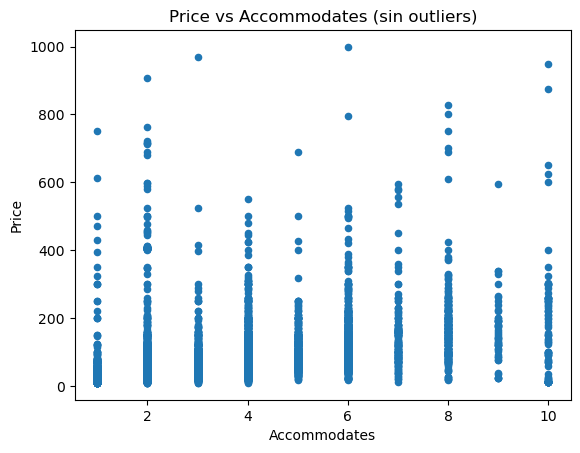

Original: 11824 // Modificado: 11711
Diferencia: 113
Variación: 0.96%


In [19]:
# Accommodates
airbnb_no_out_accommodates = airbnb_data[airbnb_data["Accommodates"] <= 10]

airbnb_no_out_accommodates.plot(kind='scatter', x='Accommodates', y='Price')
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("Price vs Accommodates (sin outliers)")
plt.show()

print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_no_out_accommodates.shape[0]}\n'
    f'Diferencia: {airbnb_data.shape[0] - airbnb_no_out_accommodates.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_no_out_accommodates.shape[0]) / airbnb_data.shape[0]) * 100:.2f}%')

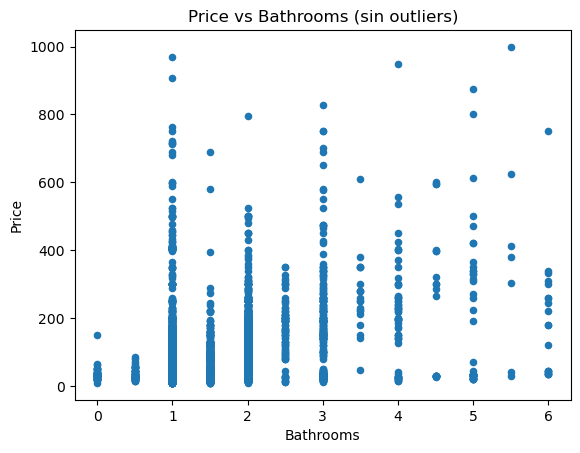

Original: 11824 // Modificado: 11767
Diferencia: 57
Variación: 0.48%


In [20]:
# Bathrooms
airbnb_no_out_bathrooms = airbnb_data[airbnb_data["Bathrooms"] <= 6]

airbnb_no_out_bathrooms.plot(kind='scatter', x='Bathrooms', y='Price')
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Price vs Bathrooms (sin outliers)")
plt.show()

print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_no_out_bathrooms.shape[0]}\n'
    f'Diferencia: {airbnb_data.shape[0] - airbnb_no_out_bathrooms.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_no_out_bathrooms.shape[0]) / airbnb_data.shape[0]) * 100:.2f}%')


### Correlacción

In [21]:
# Correlacción con Price
airbnb_data.corr(numeric_only=True)["Price"].sort_values(ascending=False)

Price                             1.000000
Cleaning Fee                      0.677539
Accommodates                      0.521981
Bedrooms                          0.505293
Beds                              0.442911
Security Deposit                  0.404978
Bathrooms                         0.392943
Guests Included                   0.304255
Host Listings Count               0.223595
Host Total Listings Count         0.223595
Calculated host listings count    0.218110
Extra People                      0.140768
Review Scores Location            0.107273
Availability 30                   0.102696
Review Scores Cleanliness         0.079943
Review Scores Rating              0.071606
Review Scores Accuracy            0.063368
Availability 60                   0.063035
Availability 365                  0.053159
Availability 90                   0.030580
Minimum Nights                    0.025933
Review Scores Value               0.024271
Host Response Rate                0.014605
Review Scor

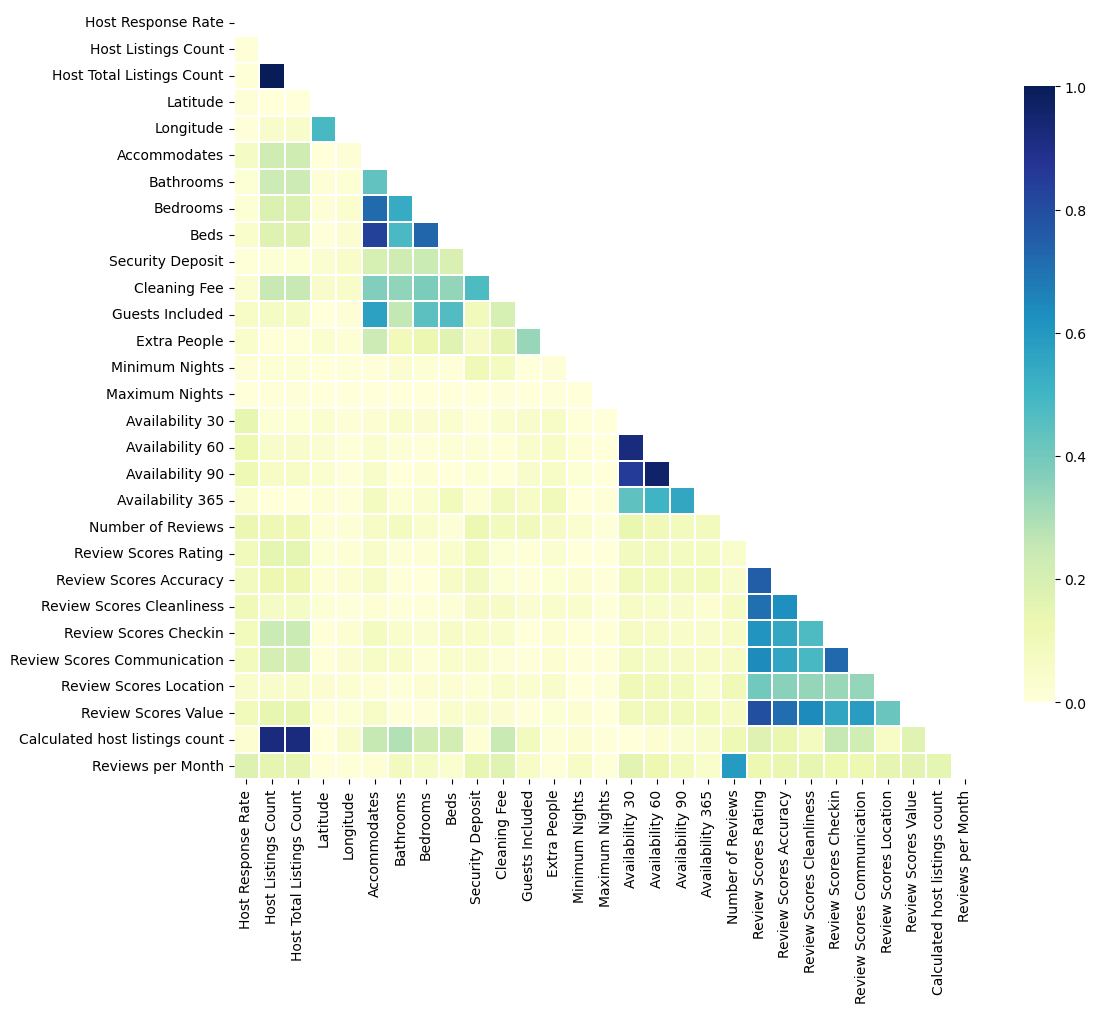

In [22]:
# Matriz de Correlation
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr(numeric_only=True))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

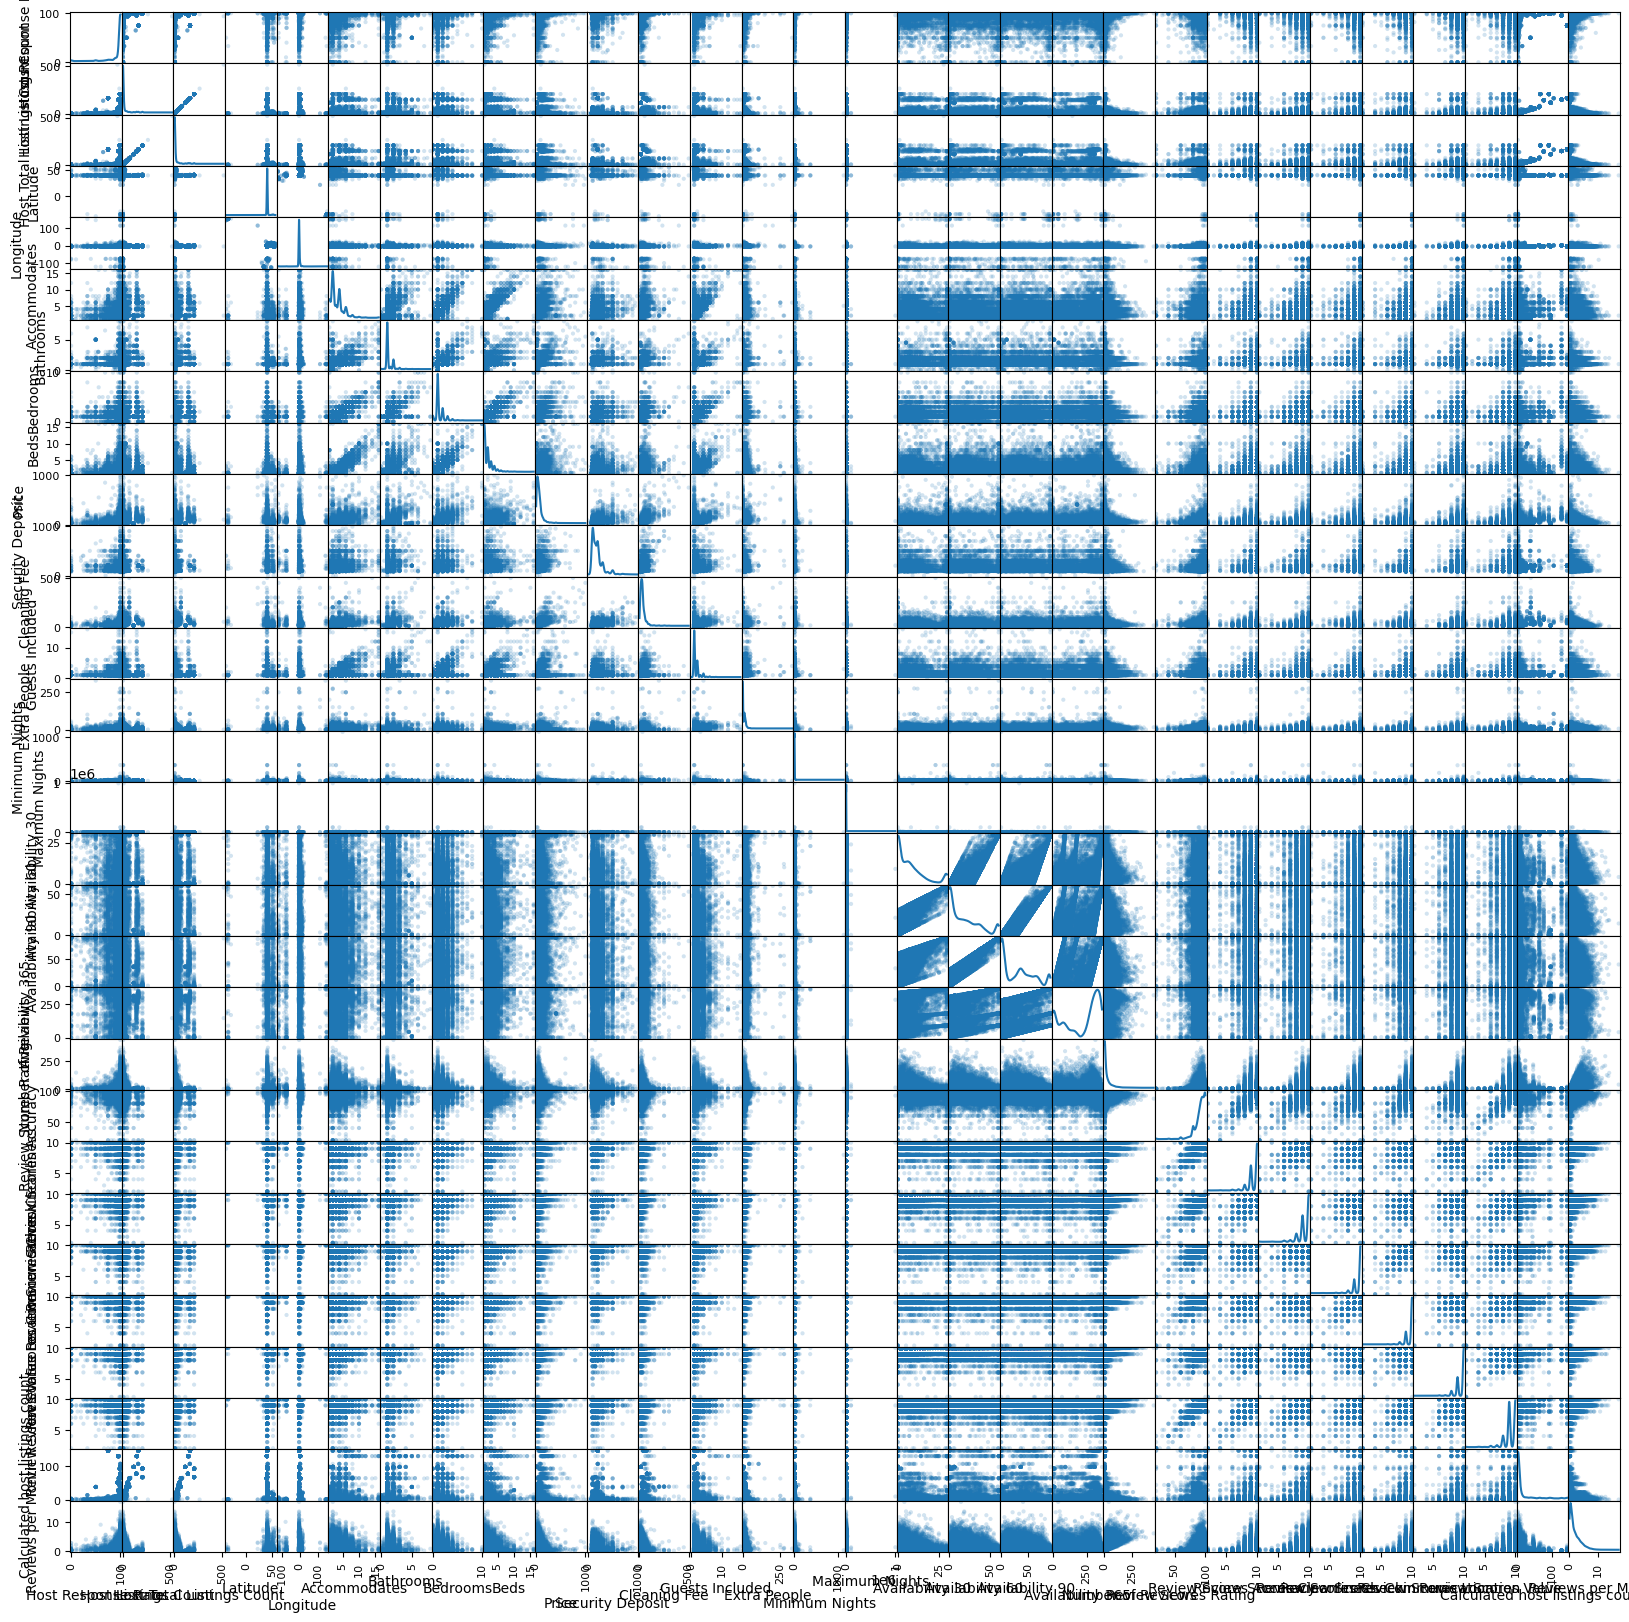

In [23]:
pd.plotting.scatter_matrix(airbnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

* Variables con mayor correlación con el precio:

    - Cleaning Fee
    - Accommodates
    - Bedrooms
    - Beds
    - Security Deposit
    - Bathrooms
    - Guests Included

## 3. Preprocesamiento

### Paso 3a. Eliminación de variables

Antes de este punto se ha realizado ya la eliminación de:

- **Variables sin valor predictivo** (como IDs, URLs o imágenes), eliminadas manualmente. -> *columns_to_drop_1*
- **Columnas con más del 70% de valores nulos**, identificadas en el análisis exploratorio. -> *columns_to_drop_2*


Se procederá a la eliminación de:
* **Variables con menor correlación <=0,05 con el precio:**

  - Maximum Nights
  - Review Scores Checkin
  - Longitude 
  - Latitude
  - Number of Reviews
  - Host Response Rate
  - Review Scores Communication
  - Review Scores Value

In [24]:
low_corr_vars = ["Maximum Nights", "Review Scores Checkin", "Longitude", "Latitude", "Number of Reviews", "Host Response Rate", "Review Scores Communication", "Review Scores Value"]

airbnb_data = airbnb_data.drop(columns=low_corr_vars)

* **Variables redundantes:**

    Muy alta correlación entre las siguientes variables, lo que indica redundancia de información. 

    - Host Listings Count
    - Host Total Listings Count

In [26]:
redundant_vars = ["Host Listings Count", "Host Total Listings Count"]

airbnb_data = airbnb_data.drop(columns=redundant_vars)

* **Variables sin valor predictivo, contienen descripciones de texto libre, datos redundantes o información incompleta. La decisión se basa en la revisión de correlación, porcentaje de nulos y utilidad práctica para el modelo.


In [ ]:
colums_to_drop_3 = [
    'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
    'Transit', 'Access', 'Interaction', 'House Rules', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications',
    'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Calendar last Scraped',
    'Amenities', 'Geolocation', 'Features', 'Bed Type'
]

airbnb_data = airbnb_data.drop(columns=colums_to_drop_3)


In [37]:
# Variables con bajo valor predictivo para el precio
columns_to_drop_3 = [
    'Name',
    'Summary',
    'Description',
    'Experiences Offered',
    'Neighborhood Overview',
    'Notes',
    'Transit',
    'Access',
    'Interaction',
    'House Rules',
    'Host About',
    'Host Name',
    'Host Location',
    'Host Neighbourhood',
    'Street',
    'Neighbourhood',
    'Neighbourhood Cleansed',
    'City',
    'State',
    'Zipcode'
]

# Eliminamos estas columnas del dataset
airbnb_data.drop(columns=columns_to_drop_3, inplace=True)


Amenities
Air conditioning,Breakfast,Washer,Essentials,Hair dryer                                                                                             1
Air conditioning,Elevator in building,Heating,Family/kid friendly,First aid kit,Essentials,Hangers,translation missing: en.hosting_amenity_50       1
Air conditioning,Heating,Essentials,translation missing: en.hosting_amenity_50                                                                      1
Air conditioning,Kitchen,Breakfast,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo                                                       1
Air conditioning,Kitchen,Breakfast,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Laptop friendly workspace     1
                                                                                                                                                   ..
Wireless Internet,translation missing: en.hosting_amenity_49                              